<a href="https://colab.research.google.com/github/kKawsarAlam/Exploratory-Data-Analysis-EDA-/blob/main/Predicting_Employee_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**List of Exploratory Data Analysis (EDA)**  


*   Data Understanding & Inspection
*   Missing Value and Dublicate Value Analysis
*   Univariate Analysis (Single Feature), Bivariate Analysis (Feature vs Feature), Multivariate Analysis  
*   Outlier Detection & Treatment
*   Distribution Analysis
*   Target Variable Analysis (MOST IMPORTANT)
*   Feature Relationships & Leakage Detection
*   Visualizing Relationship of Data
*   Model Selection
*   Documentation & Storytelling






**Exploratory Data Analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and data visualization.

**Import Libraries**

In [191]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


**Load Dataset**

In [192]:
df = pd.read_csv('/content/eda_practice_dataset.csv')

print("Dataset Imported Successfully!")
print("-"*30)

# Show First 20 Rows
df.head(20)

Dataset Imported Successfully!
------------------------------


,Age,Salary,Experience_Years,Department,Education_Level,Work_Hours_Per_Week,Remote_Work,Performance_Score,Promotion
0,56,47796.0,10,AI Research,Master,NaN,No,66.7,No
1,69,52709.0,22,Data Science,PhD,52.4,Yes,65.2,No
2,46,64472.0,15,Data Science,Bachelor,54.4,Yes,66.3,No
3,32,34028.0,30,Data Science,PhD,53.5,No,71.7,No
4,60,51631.0,10,Machine Learning,NaN,41.8,No,107.7,Yes
5,25,51586.0,15,Web Development,Bachelor,45.5,Yes,64.9,No
6,38,63810.0,7,Data Science,Bachelor,30.3,Yes,65.4,No
7,56,46599.0,3,Data Science,Bachelor,44.1,No,71.0,No
8,36,NaN,39,Machine Learning,Bachelor,56.8,Yes,86.4,Yes
9,40,66540.0,3,Data Science,Master,38.4,No,48.7,No


**Check Data Size**

In [193]:
# Display basic info of data
print('📊 Dataset Shape:', df.shape)
print(f'\n📝 Total Records: {df.shape[0]}')
print(f'📝 Total Features: {df.shape[1]}')

📊 Dataset Shape: (300, 9)

📝 Total Records: 300
📝 Total Features: 9


**Features Summary**

In [194]:
feature_summary = pd.DataFrame({
    "Data_Type": df.dtypes,
    "Missing_Values": df.isnull().sum(),
    "Missing_%": (df.isnull().sum() / len(df)) * 100
})

feature_summary = feature_summary.reset_index()
feature_summary.rename(columns={"index": "Features"}, inplace=True)

print('Features Summary')
print('-'*60)
feature_summary


Features Summary
------------------------------------------------------------


,Features,Data_Type,Missing_Values,Missing_%
0,Age,int64,0,0.0
1,Salary,float64,24,8.0
2,Experience_Years,int64,0,0.0
3,Department,object,0,0.0
4,Education_Level,object,24,8.0
5,Work_Hours_Per_Week,float64,24,8.0
6,Remote_Work,object,0,0.0
7,Performance_Score,float64,0,0.0
8,Promotion,object,0,0.0


**Handle Mission Values**

In [195]:
df["Education_Level"].value_counts()

,count
Education_Level,
Bachelor,168
Master,78
PhD,30


In [196]:
df["Education_Level"] = df["Education_Level"].fillna("Bachelor")
df["Salary"] = df["Salary"].fillna(df["Salary"].median())
df['Work_Hours_Per_Week'] = df['Work_Hours_Per_Week'].fillna(df['Work_Hours_Per_Week'].median())

In [197]:
df.isnull().sum()

,0
Age,0
Salary,0
Experience_Years,0
Department,0
Education_Level,0
Work_Hours_Per_Week,0
Remote_Work,0
Performance_Score,0
Promotion,0


In [198]:
df.head(20)

,Age,Salary,Experience_Years,Department,Education_Level,Work_Hours_Per_Week,Remote_Work,Performance_Score,Promotion
0,56,47796.0,10,AI Research,Master,45.85,No,66.7,No
1,69,52709.0,22,Data Science,PhD,52.40,Yes,65.2,No
2,46,64472.0,15,Data Science,Bachelor,54.40,Yes,66.3,No
3,32,34028.0,30,Data Science,PhD,53.50,No,71.7,No
4,60,51631.0,10,Machine Learning,Bachelor,41.80,No,107.7,Yes
5,25,51586.0,15,Web Development,Bachelor,45.50,Yes,64.9,No
6,38,63810.0,7,Data Science,Bachelor,30.30,Yes,65.4,No
7,56,46599.0,3,Data Science,Bachelor,44.10,No,71.0,No
8,36,49928.5,39,Machine Learning,Bachelor,56.80,Yes,86.4,Yes
9,40,66540.0,3,Data Science,Master,38.40,No,48.7,No


In [199]:
# Convert Data Type (float) into (int) for "Work_Hours_Per_Week" column
df['Work_Hours_Per_Week'] = df['Work_Hours_Per_Week'].astype(int)

**Statistical Description**

In [200]:
df.describe()

,Age,Salary,Experience_Years,Work_Hours_Per_Week,Performance_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,43.320000,51553.580000,19.706667,45.546667,70.189000
std,15.326686,24272.105857,12.072826,12.305795,15.209238
min,18.000000,-461.000000,0.000000,20.000000,27.900000
25%,30.000000,39911.000000,9.000000,39.000000,60.900000
50%,43.500000,49928.500000,21.000000,45.000000,68.800000
75%,56.000000,59101.000000,30.000000,52.000000,81.275000
max,69.000000,251964.000000,39.000000,111.000000,108.200000


**Convert Features Name into Lowercase**

In [201]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,age,salary,experience_years,department,education_level,work_hours_per_week,remote_work,performance_score,promotion
0,56,47796.0,10,AI Research,Master,45,No,66.7,No
1,69,52709.0,22,Data Science,PhD,52,Yes,65.2,No
2,46,64472.0,15,Data Science,Bachelor,54,Yes,66.3,No
3,32,34028.0,30,Data Science,PhD,53,No,71.7,No
4,60,51631.0,10,Machine Learning,Bachelor,41,No,107.7,Yes


**Convert Record Values into Lowercase**

In [202]:
cols = ["department", "education_level", "remote_work", "promotion"]

for col in cols:
    df[col] = df[col].str.strip().str.lower()
df.head()

,age,salary,experience_years,department,education_level,work_hours_per_week,remote_work,performance_score,promotion
0,56,47796.0,10,ai research,master,45,no,66.7,no
1,69,52709.0,22,data science,phd,52,yes,65.2,no
2,46,64472.0,15,data science,bachelor,54,yes,66.3,no
3,32,34028.0,30,data science,phd,53,no,71.7,no
4,60,51631.0,10,machine learning,bachelor,41,no,107.7,yes


**Univariate Analysis**  

Numerical Features

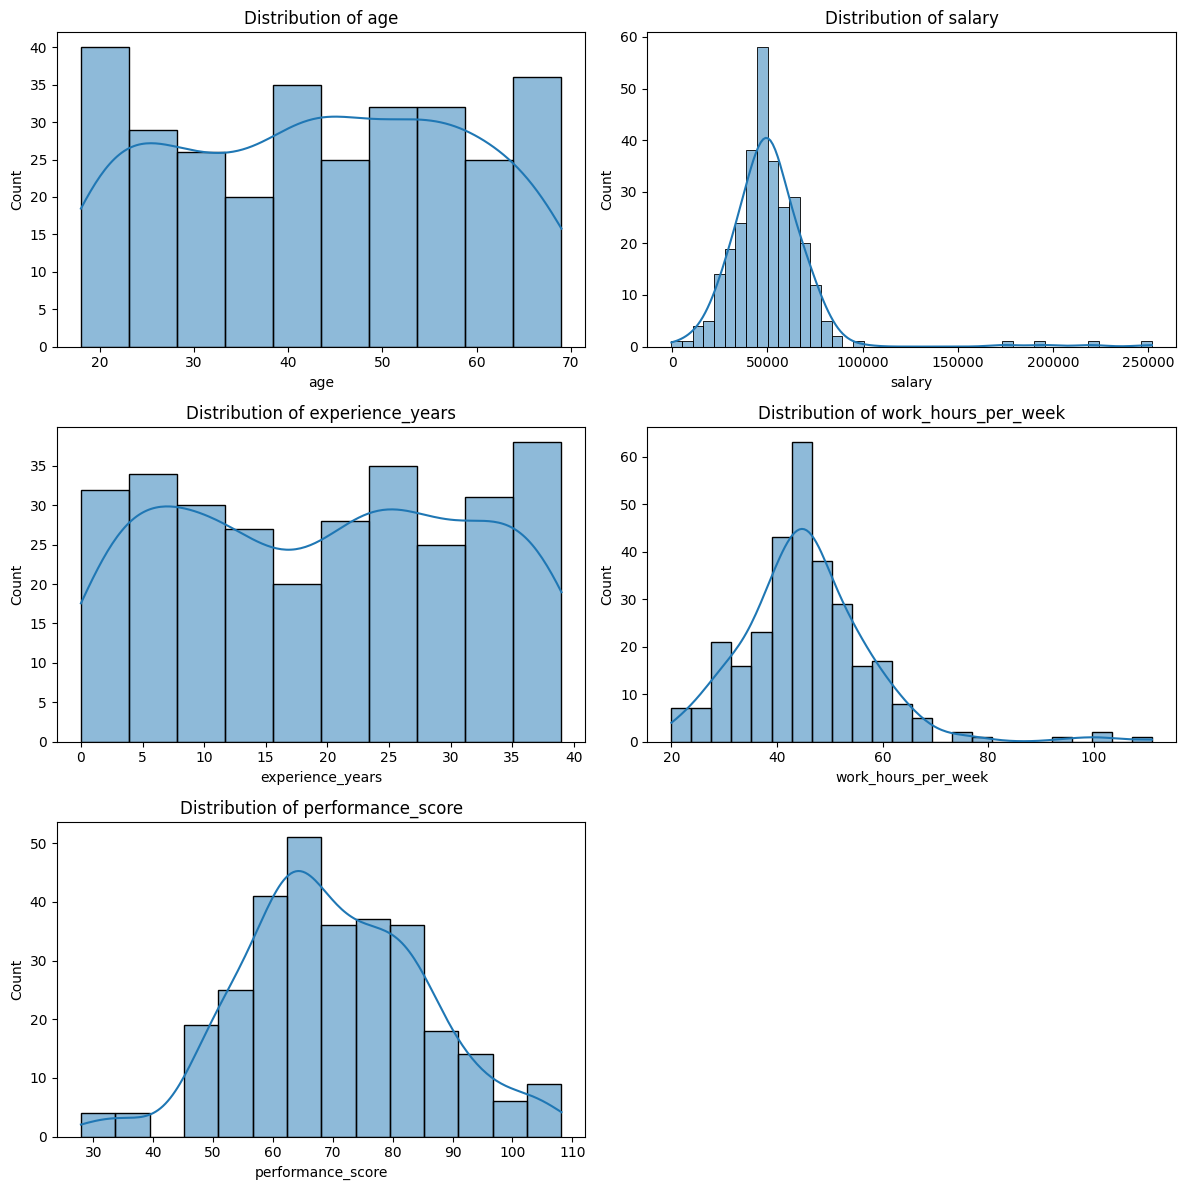

In [203]:
num_features = ["age", "salary", "experience_years",
                "work_hours_per_week", "performance_score"]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()   # flatten 2D array → 1D for easy iteration

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove unused subplot (since we have 5 features but 6 grid spaces)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Categorical Features

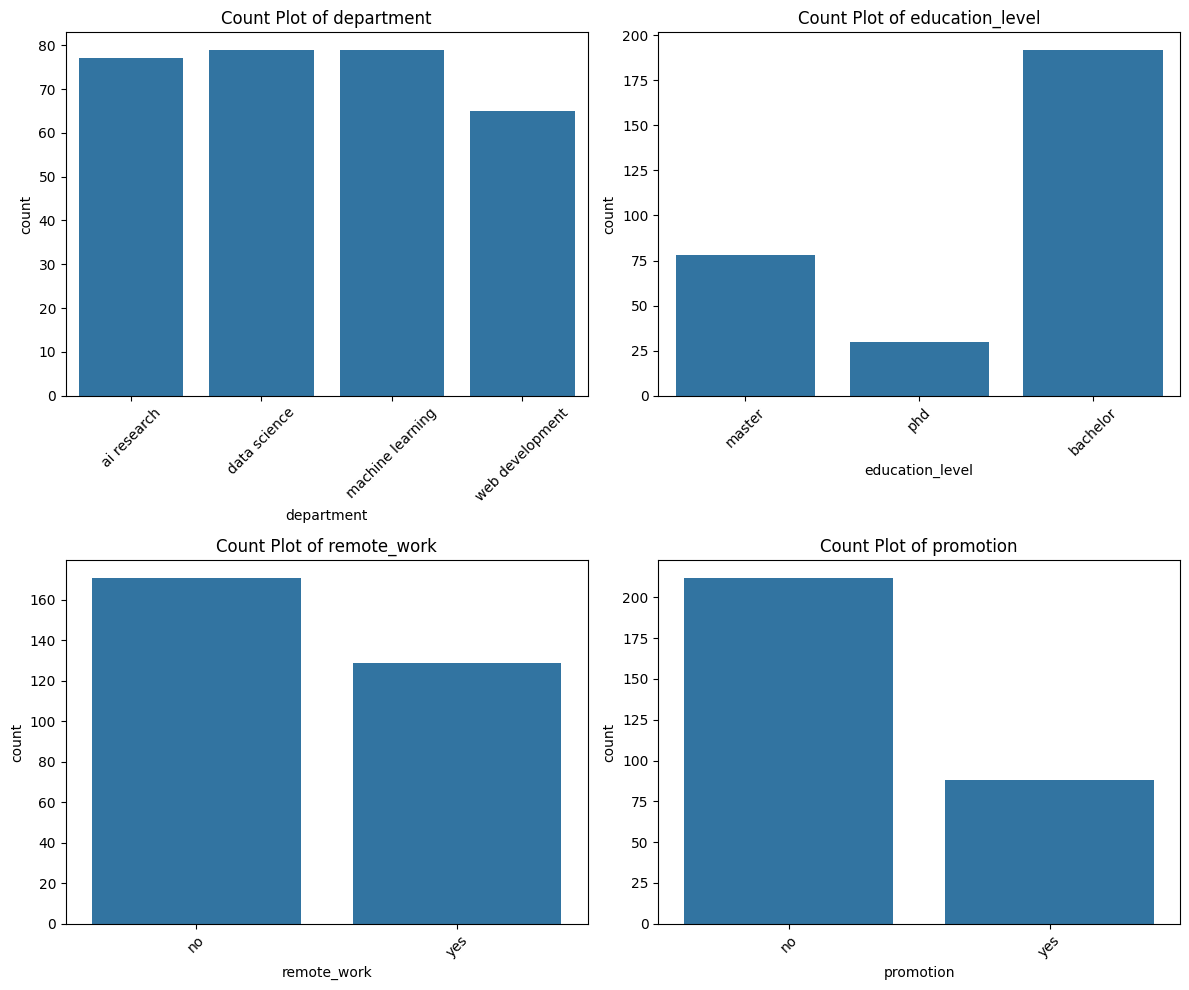

In [204]:
cat_features = ["department", "education_level", "remote_work", "promotion"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # flatten 2D array to 1D for easy iteration

for i, col in enumerate(cat_features):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # rotate x labels for readability

plt.tight_layout()
plt.show()


**Outlier Detection (IQR Method)**

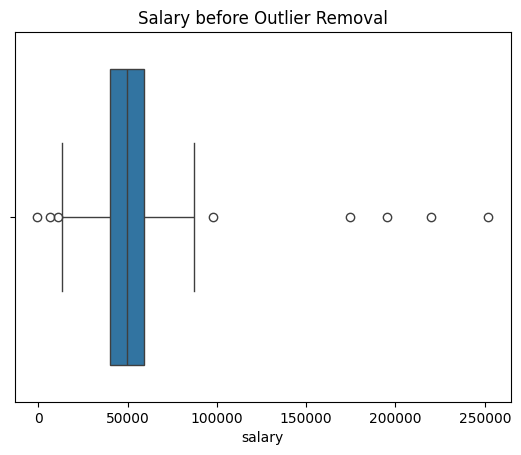

In [205]:
sns.boxplot(x=df["salary"])
plt.title("Salary before Outlier Removal")
plt.show()

**Remove Outliers**

In [206]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_clean


In [207]:
df = remove_outliers_iqr(df, "salary")


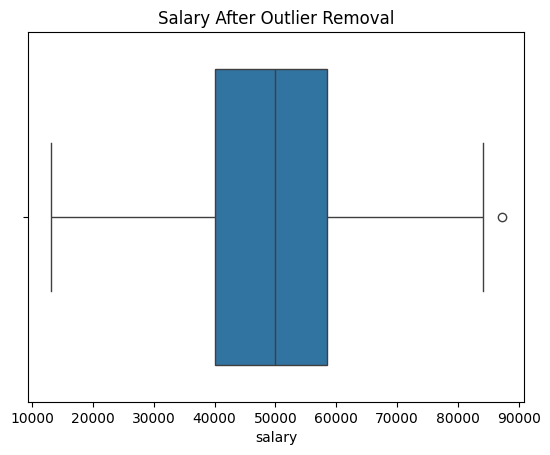

In [208]:
sns.boxplot(x=df["salary"])
plt.title("Salary After Outlier Removal")
plt.show()


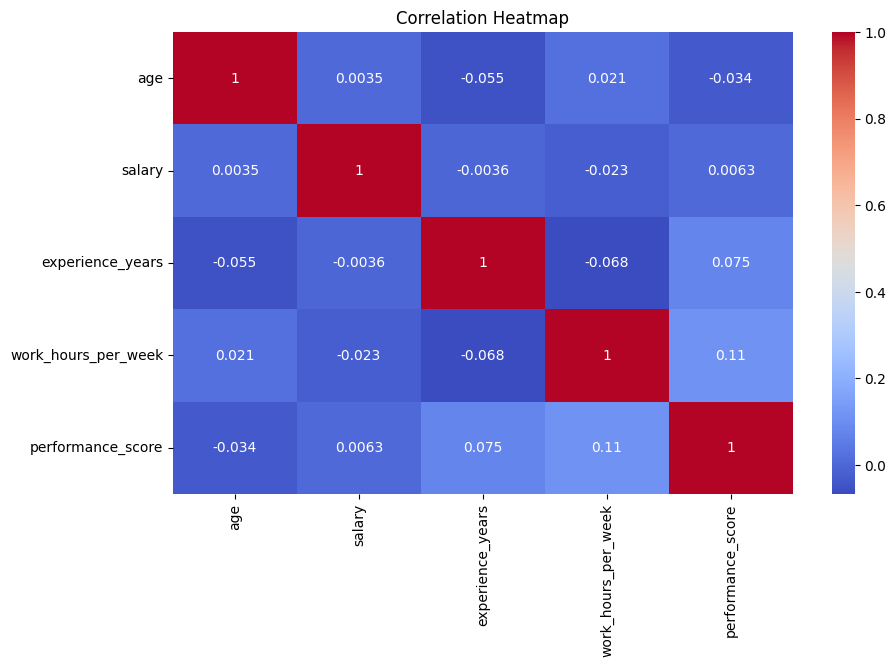

In [209]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Target Variable Analysis**

In [220]:
df["promotion"].value_counts(normalize=True) * 100


,proportion
promotion,
0,70.547945
1,29.452055


**Encoding Categorical Variables**

In [211]:
from sklearn.preprocessing import LabelEncoder
# Encode Target
le = LabelEncoder()
df["promotion"] = le.fit_transform(df["promotion"])  # Yes=1, No=0
df.head()

,age,salary,experience_years,department,education_level,work_hours_per_week,remote_work,performance_score,promotion
0,56,47796.0,10,ai research,master,45,no,66.7,0
1,69,52709.0,22,data science,phd,52,yes,65.2,0
2,46,64472.0,15,data science,bachelor,54,yes,66.3,0
3,32,34028.0,30,data science,phd,53,no,71.7,0
4,60,51631.0,10,machine learning,bachelor,41,no,107.7,1


In [221]:
# One-Hot Encode Features
df_encoded = pd.get_dummies(
    df,
    columns=["department", "education_level", "remote_work"],
    drop_first=True
).astype(int)

print('Encoded features')
print('-'*60)
df_encoded.head()

Encoded features
------------------------------------------------------------


,age,salary,experience_years,work_hours_per_week,performance_score,promotion,department_data science,department_machine learning,department_web development,education_level_master,education_level_phd,remote_work_yes
0,56,47796,10,45,66,0,0,0,0,1,0,0
1,69,52709,22,52,65,0,1,0,0,0,1,1
2,46,64472,15,54,66,0,1,0,0,0,0,1
3,32,34028,30,53,71,0,1,0,0,0,1,0
4,60,51631,10,41,107,1,0,1,0,0,0,0


**Feature Scaling**

In [213]:
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop("promotion", axis=1)
y = df_encoded["promotion"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train-Test Split**

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Model Selection**

In [215]:
from sklearn.metrics import accuracy_score, classification_report

**Logistic Regression**  

Why Logistic?  

*   Works well if relationship is linear

In [216]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.847457627118644
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.75      0.71      0.73        17

    accuracy                           0.85        59
   macro avg       0.82      0.81      0.81        59
weighted avg       0.85      0.85      0.85        59



**Decision Tree**     

Why Decision Tree?  

*   Handles outliers  
*   Captures non-linear relationships



In [217]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        17

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



I performed EDA to understand distributions, missing values, outliers, and feature relationships. Based on correlation and data behavior, I tried both linear and non-linear models and selected the better-performing one.  

Logistic Regression achieved an accuracy of 0.85, while Decision Tree achieved 1.00 accuracy. Since Logistic Regression is a linear classifier and Decision Trees are capable of modeling complex non-linear decision boundaries, the superior performance of the Decision Tree suggests that the dataset exhibits non-linear relationships among features. However, the perfect accuracy of the Decision Tree may also indicate overfitting, highlighting the need for validation using techniques such as cross-validation

**Check Overfitting Using Cross-Validation**

In [218]:
cv_scores_lr = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
print("\n")
print("Logistic Regression CV Accuracy:", cv_scores_lr)
print("Mean:", cv_scores_lr.mean())
print("\n")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



Logistic Regression CV Accuracy: [0.88135593 0.77966102 0.74137931 0.86206897 0.94827586]
Mean: 0.8425482174167153




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [219]:
cv_scores_dt = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print("Decision Tree CV Accuracy:", cv_scores_dt)
print("Mean:", cv_scores_dt.mean())


Decision Tree CV Accuracy: [0.98305085 1.         1.         1.         1.        ]
Mean: 0.9966101694915255
